In [1]:
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import json
import os
import random

# India vs Japan Similarity Correlation

In [2]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            r, p = sp.pearsonr(a,c)
            if(r>statistic):
                p_values.append(p)
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [3]:
def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr

In [4]:
PATH = './output/japan/similarity/'
japanese_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    japanese_pairwise.extend(x)
japanese_pairwise = [x/100 for x in japanese_pairwise]

In [5]:
PATH = './output/india/pairwise/'

indian_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    indian_pairwise.extend(x)
indian_pairwise = [1- (x / 100) for x in indian_pairwise]

In [6]:
## Japan vs India Correlation
a = japanese_pairwise
b = indian_pairwise
n = 1000
r, p = sp.pearsonr(a,b)
statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
print(r, sig, n)

0.8038960671468731 0.000999000999000999 1000


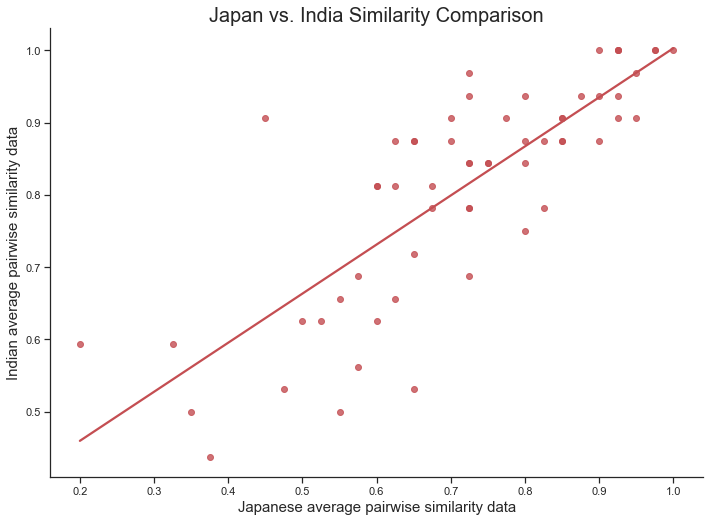

In [8]:
## Japan vs India Plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=japanese_pairwise, y=indian_pairwise, ci=None, color="r")
p.set_xlabel("Japanese average pairwise similarity data", fontsize = 15)
p.set_ylabel("Indian average pairwise similarity data", fontsize = 15)
p.set_title("Japan vs. India Similarity Comparison", fontsize = 20)
sns.despine()  
# https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn

In [35]:
correlations = np.zeros((6,6))
correlations
# Rows

#North Musician = 0
#South Musician = 1
#North Non = 2
#South Non = 3
#South = 4
#Japan = 5

# South

#North Musician = 0
#South Musician = 1
#North Non = 2
#South Non = 3
#North = 4
#South = 5

# p-value = i, j
# r = j,i

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [36]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician

b = south_musician

n = 1000

r, p = sp.pearsonr(a,b)

statistic = r

results = permutations(list(a),list(b),statistic, n)

Sum_p = sum(results)

sig = (Sum_p+1)/(n+1)

# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)

print(r, sig, n)

# 0.8038960671468731 0.000999000999000999 1000

correlations[1,0] = round(r,2)
correlations[0,1] = round(sig,4)
correlations

0.24662389302015125 0.002071866818709382 1000


array([[0.    , 0.0021, 0.    , 0.    , 0.    , 0.    ],
       [0.25  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [37]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician

b = south_musician

n = 1000

r, p = sp.pearsonr(a,b)

statistic = r

results = permutations(list(a),list(b),statistic, n)

Sum_p = sum(results)

sig = (Sum_p+1)/(n+1)

# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)

print(r, sig, n)

# 0.8038960671468731 0.000999000999000999 1000

correlations[2,0] = round(r,2)
correlations[0,2] = round(sig,4)
correlations

0.41567497056838454 0.000999000999000999 1000


array([[0.    , 0.0021, 0.001 , 0.    , 0.    , 0.    ],
       [0.25  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.42  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [38]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician

b = south_musician

n = 1000

r, p = sp.pearsonr(a,b)

statistic = r

results = permutations(list(a),list(b),statistic, n)

Sum_p = sum(results)

sig = (Sum_p+1)/(n+1)

# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)

print(r, sig, n)

# 0.8038960671468731 0.000999000999000999 1000

correlations[3,0] = round(r,2)
correlations[0,3] = round(sig,4)
correlations

0.44553032807838044 0.000999000999000999 1000


array([[0.    , 0.0021, 0.001 , 0.001 , 0.    , 0.    ],
       [0.25  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.42  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.45  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [39]:
PATH = './output/india/pairwise/'

north_musician = []
for i in range(6):

    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()

    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])

    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician

b = south_musician

n = 1000

r, p = sp.pearsonr(a,b)

statistic = r

results = permutations(list(a),list(b),statistic, n)

Sum_p = sum(results)

sig = (Sum_p+1)/(n+1)

# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)

print(r, sig, n)

# 0.8038960671468731 0.000999000999000999 1000

correlations[2,1] = round(r,2)
correlations[1,2] = round(sig,4)
correlations

0.5869197919493923 0.000999000999000999 1000


array([[0.    , 0.0021, 0.001 , 0.001 , 0.    , 0.    ],
       [0.25  , 0.    , 0.001 , 0.    , 0.    , 0.    ],
       [0.42  , 0.59  , 0.    , 0.    , 0.    , 0.    ],
       [0.45  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [40]:
PATH = './output/india/pairwise/'
north_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)
south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)
statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)

correlations[3,1] = round(r,2)
correlations[1,3] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.    , 0.    ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.    ],
       [0.42  , 0.59  , 0.    , 0.    , 0.    , 0.    ],
       [0.45  , 0.35  , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [44]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[4,0] = round(r,2)
correlations[0,4] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.    ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.    ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.    , 0.    ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.    , 0.    ],
       [0.85  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [45]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[5,0] = round(r,2)
correlations[0,5] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.    ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.    , 0.    ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.    , 0.    ],
       [0.85  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.42  , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [46]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[5,1] = round(r,2)
correlations[1,5] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.    , 0.    ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.    , 0.    ],
       [0.85  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.42  , 0.83  , 0.    , 0.    , 0.    , 0.    ]])

In [47]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[5,2] = round(r,2)
correlations[2,5] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.    , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.    , 0.    ],
       [0.85  , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.42  , 0.83  , 0.65  , 0.    , 0.    , 0.    ]])

In [51]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[4,3] = round(r,2)
correlations[3,4] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.    , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.001 , 0.001 ],
       [0.85  , 0.    , 0.    , 0.55  , 0.    , 0.    ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.    , 0.    ]])

In [52]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[4,2] = round(r,2)
correlations[2,4] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.001 , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.001 , 0.001 ],
       [0.85  , 0.    , 0.83  , 0.55  , 0.    , 0.    ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.    , 0.    ]])

In [54]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[5,4] = round(r,2)
correlations[4,5] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.001 , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.001 , 0.001 ],
       [0.85  , 0.    , 0.83  , 0.55  , 0.    , 0.001 ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.63  , 0.    ]])

In [55]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[3,2] = round(r,2)
correlations[2,3] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.    , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.001 , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.001 , 0.001 ],
       [0.85  , 0.    , 0.83  , 0.55  , 0.    , 0.001 ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.63  , 0.    ]])

In [60]:
PATH = './output/india/pairwise/'

north_musician = []

for i in range(6):

    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correlations[4,1] = round(r,2)
correlations[1,4] = round(sig,4)
correlations

array([[0.    , 0.0021, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  , 0.    , 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.42  , 0.59  , 0.    , 0.001 , 0.001 , 0.001 ],
       [0.45  , 0.35  , 0.48  , 0.    , 0.001 , 0.001 ],
       [0.85  , 0.49  , 0.83  , 0.55  , 0.    , 0.001 ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.63  , 0.    ]])

In [68]:
for i in range(6):
    for j in range(6):
        if i==j:
            correlations[i,j]=None

<AxesSubplot:>

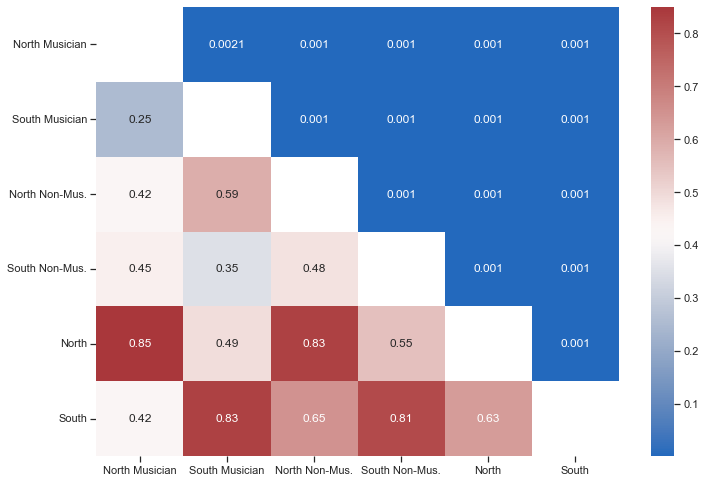

In [69]:
labels = ['North Musician','South Musician', 'North Non-Mus.','South Non-Mus.', 'North', 'South', ]
df = pd.DataFrame(correlations, columns=labels, index=labels)
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(df, annot=True, cmap=cmap)

In [81]:
correl_2 = np.zeros((7,7))
correl_2[:6,:6] = correlations

In [84]:
correl_2[6,6] = None

In [152]:
south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,0] = round(r,2)
correl_2[0,6] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,1] = round(r,2)
correl_2[1,6] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,2] = round(r,2)
correl_2[2,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,3] = round(r,2)
correl_2[3,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,4] = round(r,2)
correl_2[4,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,5] = round(r,2)
correl_2[5,6] = round(sig,4)
correl_2

array([[   nan, 0.0021, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.25  ,    nan, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.42  , 0.59  ,    nan, 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.45  , 0.35  , 0.48  ,    nan, 0.001 , 0.001 , 0.001 ],
       [0.85  , 0.49  , 0.83  , 0.55  ,    nan, 0.001 , 0.001 ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.63  ,    nan, 0.001 ],
       [0.63  , 0.58  , 0.64  , 0.56  , 0.75  , 0.69  ,    nan]])

<AxesSubplot:>

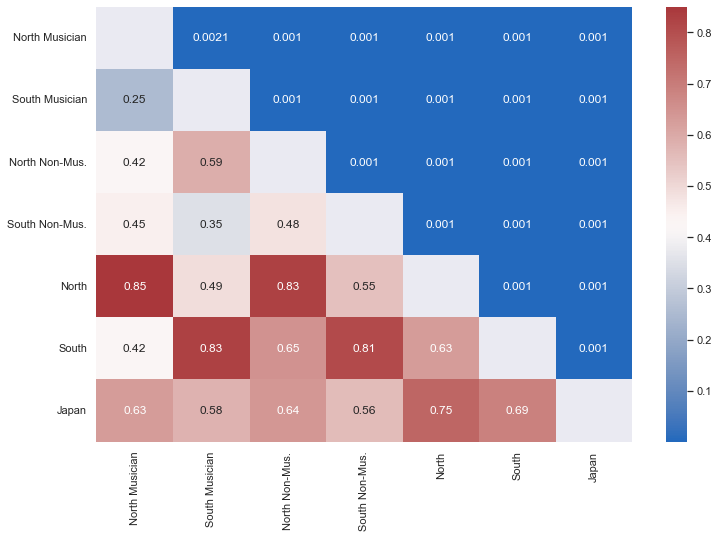

In [144]:
labels = ['North Musician','South Musician', 'North Non-Mus.','South Non-Mus.', 'North', 'South','Japan' ]
df2 = pd.DataFrame(correl_2, columns=labels, index=labels)
cmap = sns.color_palette("vlag", as_cmap=True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df2, annot=True, cmap=cmap)

In [155]:
correl_3 = np.zeros((8,8))
correl_3[:7,:7]= correl_2

In [156]:
correl_3

array([[   nan, 0.0021, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.    ],
       [0.25  ,    nan, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.    ],
       [0.42  , 0.59  ,    nan, 0.001 , 0.001 , 0.001 , 0.001 , 0.    ],
       [0.45  , 0.35  , 0.48  ,    nan, 0.001 , 0.001 , 0.001 , 0.    ],
       [0.85  , 0.49  , 0.83  , 0.55  ,    nan, 0.001 , 0.001 , 0.    ],
       [0.42  , 0.83  , 0.65  , 0.81  , 0.63  ,    nan, 0.001 , 0.    ],
       [0.63  , 0.58  , 0.64  , 0.56  , 0.75  , 0.69  ,    nan, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [160]:
PATH = './output/india/pairwise/'

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,0] = round(r,2)
correl_3[0,7] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,1] = round(r,2)
correl_3[1,7] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,2] = round(r,2)
correl_3[2,7] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,3] = round(r,2)
correl_3[3,7] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,4] = round(r,2)
correl_3[4,7] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = indian_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_3[7,5] = round(r,2)
correl_3[5,7] = round(sig,4)

## Japan vs India Correlation
a = japanese_pairwise
b = indian_pairwise
n = 1000
r, p = sp.pearsonr(a,b)

correl_3[7,6] = round(r,2)
correl_3[6,7] = round(sig,4)

<AxesSubplot:>

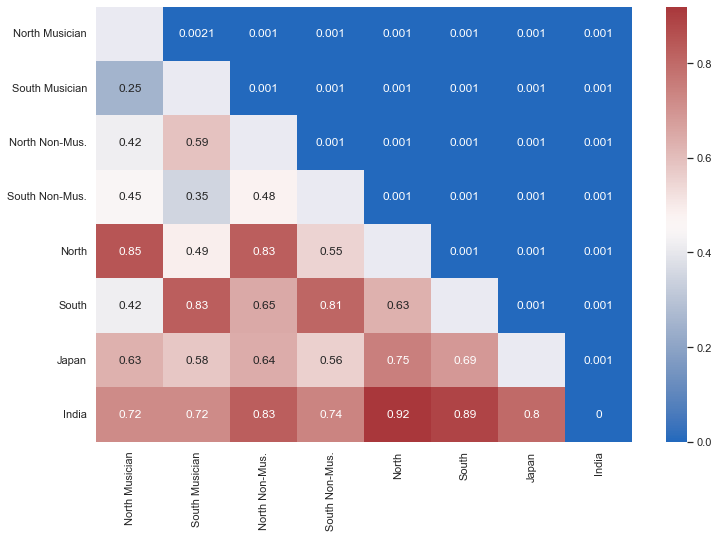

In [161]:
labels = ['North Musician','South Musician', 'North Non-Mus.','South Non-Mus.', 'North', 'South','Japan', 'India']
df2 = pd.DataFrame(correl_3, columns=labels, index=labels)
cmap = sns.color_palette("vlag", as_cmap=True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df2, annot=True, cmap=cmap)

## Correlations

In [38]:
PATH = './output/india/pairwise/'

def correlation(category, label, title):
    a = []
    b = []
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[0]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        a.extend(x)
    a = [1- (x / 100) for x in a]
                           
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[1]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        b.extend(x)
    b = [1- (x / 100) for x in b]
    n = 1000
    r, p = sp.pearsonr(a,b)
    statistic = r
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    # Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
    print(r, sig, n)
                           
    ## Japan vs India Plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_style('ticks')
    p = sns.regplot(x=a, y=b, ci=None, color="b")
    p.set_xlabel(label[0], fontsize = 15)
    p.set_ylabel(label[1], fontsize = 15)
    p.set_title(title, fontsize = 20)
    sns.despine()  

0.6629765121351706 0.000999000999000999 1000


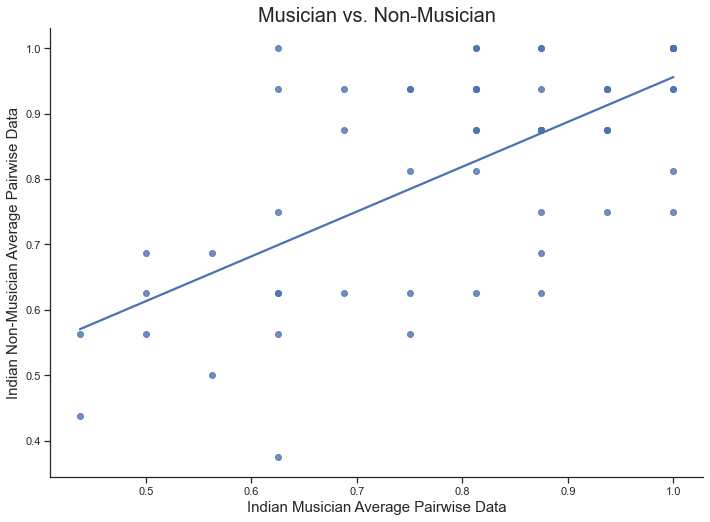

In [45]:
correlation(['musician', 'non'], 
            ['Indian Musician Average Pairwise Data','Indian Non-Musician Average Pairwise Data'],
            'Musician vs. Non-Musician'
           )

0.6324142685494185 0.000999000999000999 1000


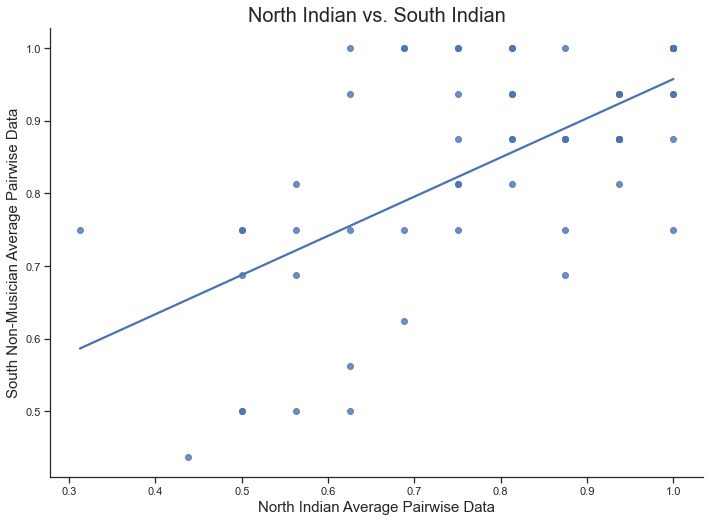

In [44]:
correlation(['north', 'south'], 
            ['North Indian Average Pairwise Data','South Non-Musician Average Pairwise Data'],
            'North Indian vs. South Indian'
           )

## Feature 

In [78]:
import plotly.express as px
from sklearn.decomposition import PCA

PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=3)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [97]:
PATH = './output/japan/similarity/'
japanese_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    japanese_pairwise.extend(x)
japanese_pairwise = [x/100 for x in japanese_pairwise]

In [134]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
results = pd.DataFrame(columns=['r_india', 'p_india', 'r_japan','p_japan'], index=feature_names)
full_partial = pd.read_csv('./output/japan/feature/ornamentation_average.csv')
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j:j+5, j:j+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, japanese_pairwise)
    x = [feature_names[i-1], r,p]
    results.loc[feature_names[i-1], 'r_japan'] = round(r,2)
    results.loc[feature_names[i-1], 'p_japan'] = round(p,2)

In [135]:
PATH = './output/india/pairwise/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_full.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_india'] = round(r,2)
    results.loc[feature_names[i-1], 'p_india'] = round(p,2)

In [138]:
results.to_csv('./output/analysis/feature_pairwise.csv')

## Feature PCA

In [76]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

PATH = './output/india/feature/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=2)
components = pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

fig.show()

In [79]:
PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=2)
components = pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

fig.show()

In [74]:
pd.DataFrame(loadings)

,0,1
0,-6.744960,-35.383291
1,10.850527,2.898645
2,20.203552,0.451457
3,11.787055,0.348859
4,19.417854,-1.631972
5,18.857791,-4.323617
6,2.729577,8.540970
7,-3.110389,-2.604532
8,9.164370,2.711705
9,13.414719,-3.425558
